In [1]:
import numpy as np
import pandas as pd  # To read data
from sklearn.linear_model import LinearRegression
import seaborn as sns #To visualise
import matplotlib.pyplot as plt  # To visualize
import dash
from dash import html
from jupyter_dash import JupyterDash
from dash import dcc, html, Input, Output, dash_table
import plotly.express as px
import pandas as pd
import numpy as np

In [2]:
#reading in the NBA players dataset 
nba_player_data= pd.read_csv("Data/all_seasons.csv")
#reading in the continents 2 dataset that contains the ISO alpha values for each country.
continents2=pd.read_csv("Data/continents2.csv")
#renaming "name" column to "country" to match the nba player dataset.
continents2 = continents2.rename(columns={"name": "country"})
#getting all the unique values for countries.
unique_countries=nba_player_data["country"].unique()
print(unique_countries)






['USA' 'Nigeria' 'Republic of the Congo' 'Canada' 'Serbia' 'Ukraine'
 'Croatia' 'Jamaica' 'Lithuania' 'Slovenia' 'U.S. Virgin Islands' 'France'
 'St. Vincent & Grenadines' 'Germany' 'Dominican Republic' 'New Zealand'
 'Georgia' 'Belize' 'United Kingdom' 'Turkey' 'Greece' 'Finland' 'Senegal'
 'Mexico' 'Puerto Rico' 'China' 'Argentina' 'Mali' 'Spain' 'Venezuela'
 'Haiti' 'Russia' 'Brazil' 'Ireland' 'Poland' 'Netherlands'
 'Czech Republic' 'Montenegro' 'Democratic Republic of the Congo' 'Latvia'
 'South Korea' 'Australia' 'Uruguay' 'Sudan' 'Italy' 'Switzerland' 'Gabon'
 'Cameroon' 'Iran' 'Israel' 'Tanzania' 'Sweden' 'Panama'
 'Bosnia and Herzegovina' 'Macedonia' 'Cape Verde' 'Tunisia' 'South Sudan'
 'Bahamas' 'Ghana' 'Austria' 'Egypt' 'Trinidad and Tobago' 'Japan'
 'Angola' 'Saint Lucia' 'Guinea' 'Denmark' 'Colombia' 'Portugal']


<p>I had to map certain countries below as some countries don't exist today. </p>

In [236]:
serbia_montenegro_count = nba_player_data[nba_player_data["country"] == "Serbia and Montenegro"]

#changing players from"Serbia and Montenegro to Serbia"
serbia_montenegro_count=serbia_montenegro_count["player_name"].unique()
print(serbia_montenegro_count)

nba_player_data.loc[nba_player_data["country"] == "Serbia and Montenegro", "country"] = "Serbia"

#changing players from England to United Kingdom
nba_player_data.loc[nba_player_data["country"] == "England", "country"] = "United Kingdom"

#changing players from Great Britain to United Kingdom
nba_player_data.loc[nba_player_data["country"] == "Great Britain", "country"] = "United Kingdom"

#changing players from DRC to Democratic Republic of the Congo
nba_player_data.loc[nba_player_data["country"] == "DRC", "country"] = "Democratic Republic of the Congo"

#changing players from USSR to Russia
nba_player_data.loc[nba_player_data["country"] == "USSR", "country"] = "Russia"

#changing players from Congo to Republic Of The Congo 
nba_player_data.loc[nba_player_data["country"] == "Congo", "country"] = "Republic of the Congo"

#changing players from Bosnia to Bosnia and Herzegovina 
nba_player_data.loc[nba_player_data["country"] == "Bosnia", "country"] = "Bosnia and Herzegovina"
#changing players from Bosnia & Herzegovina to Bosnia and Herzegovina 
nba_player_data.loc[nba_player_data["country"] == "Bosnia & Herzegovina", "country"] = "Bosnia and Herzegovina"

#changing players from US Virgin Islands to U.S Virgin Islands 
nba_player_data.loc[nba_player_data["country"] == "US Virgin Islands", "country"] = "U.S. Virgin Islands"

#changing players from Sudan(UK) to Sudan 
nba_player_data.loc[nba_player_data["country"] == "Sudan (UK)", "country"] = "Sudan"

#changing players from Yugoslavia to Serbia 
nba_player_data.loc[nba_player_data["country"] == "Yugoslavia", "country"] = "Serbia"

#changing players from Scotland to United Kingdom 
nba_player_data.loc[nba_player_data["country"] == "Scotland", "country"] = "United Kingdom"

#changing players from Cabo Verde to Cape Verde 
nba_player_data.loc[nba_player_data["country"] == "Cabo Verde", "country"] = "Cape Verde"
#showing the updated countries
unique_countries=nba_player_data["country"].unique()
print(unique_countries)

[]
['USA' 'Nigeria' 'Republic of the Congo' 'Canada' 'Serbia' 'Ukraine'
 'Croatia' 'Jamaica' 'Lithuania' 'Slovenia' 'U.S. Virgin Islands' 'France'
 'St. Vincent & Grenadines' 'Germany' 'Dominican Republic' 'New Zealand'
 'Georgia' 'Belize' 'United Kingdom' 'Turkey' 'Greece' 'Finland' 'Senegal'
 'Mexico' 'Puerto Rico' 'China' 'Argentina' 'Mali' 'Spain' 'Venezuela'
 'Haiti' 'Russia' 'Brazil' 'Ireland' 'Poland' 'Netherlands'
 'Czech Republic' 'Montenegro' 'Democratic Republic of the Congo' 'Latvia'
 'South Korea' 'Australia' 'Uruguay' 'Sudan' 'Italy' 'Switzerland' 'Gabon'
 'Cameroon' 'Iran' 'Israel' 'Tanzania' 'Sweden' 'Panama'
 'Bosnia and Herzegovina' 'Macedonia' 'Cape Verde' 'Tunisia' 'South Sudan'
 'Bahamas' 'Ghana' 'Austria' 'Egypt' 'Trinidad and Tobago' 'Japan'
 'Angola' 'Saint Lucia' 'Guinea' 'Denmark' 'Colombia' 'Portugal']


In [237]:


# Merging the nba_player_data dataset with the continents 2 dataset so it can be used on the choropleth chart.
nba_player_data = nba_player_data.merge(continents2[["country", "alpha-3","region"]], on="country", how="left")

nba_player_data


,player_id,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,alpha-3,region
0,0,Randy Livingston,HOU,22,193.04,94.800728,Louisiana State,USA,1996,2,...,2.4,0.3,0.042,0.071,0.169,0.487,0.248,1996,USA,Americas
1,1,Gaylon Nickerson,WAS,28,190.50,86.182480,Northwestern Oklahoma,USA,1994,2,...,0.3,8.9,0.030,0.111,0.174,0.497,0.043,1996,USA,Americas
2,2,George Lynch,VAN,26,203.20,103.418976,North Carolina,USA,1993,1,...,1.9,-8.2,0.106,0.185,0.175,0.512,0.125,1996,USA,Americas
3,3,George McCloud,LAL,30,203.20,102.058200,Florida State,USA,1989,1,...,1.7,-2.7,0.027,0.111,0.206,0.527,0.125,1996,USA,Americas
4,4,George Zidek,DEN,23,213.36,119.748288,UCLA,USA,1995,1,...,0.3,-14.1,0.102,0.169,0.195,0.500,0.064,1996,USA,Americas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12839,12839,Joel Embiid,PHI,29,213.36,127.005760,Kansas,Cameroon,2014,1,...,4.2,8.8,0.057,0.243,0.370,0.655,0.233,2022,CMR,Africa
12840,12840,John Butler Jr.,POR,20,213.36,86.182480,Florida State,USA,Undrafted,Undrafted,...,0.6,-16.1,0.012,0.065,0.102,0.411,0.066,2022,USA,Americas
12841,12841,John Collins,ATL,25,205.74,102.511792,Wake Forest,USA,2017,1,...,1.2,-0.2,0.035,0.180,0.168,0.593,0.052,2022,USA,Americas
12842,12842,Jericho Sims,NYK,24,208.28,113.398000,Texas,USA,2021,2,...,0.5,-6.7,0.117,0.175,0.074,0.780,0.044,2022,USA,Americas


<p>I decided to update the seasons value in order to easily create graphs.</p>
<p>For example, 1996/97 season is updated to the 1996 season.</p>
<p>*An error is occuring because the values are alredy updated in the dataset and it is trying update an integer value in which I converted it to after I manipulated the string values*.</p>

<p>*The code below does work if you read in the NBA Player dataset straight from Kaggle.*</p>

In [238]:
# Updating season's value from "1996/97" to 1996 and converting it to an integer
# so the "1996" season will represent the 1996/97 season
nba_player_data['season'] = nba_player_data['season'].str.split('-').str[0].astype(int)
nba_player_data['season']

AttributeError: Can only use .str accessor with string values!

In [3]:
nba_player_data.isnull().sum()





Unnamed: 0              0
player_id               0
player_name             0
team_abbreviation       0
age                     0
player_height           0
player_weight           0
college              1854
country                 0
draft_year              0
draft_round             0
draft_number            0
gp                      0
pts                     0
reb                     0
ast                     0
net_rating              0
oreb_pct                0
dreb_pct                0
usg_pct                 0
ts_pct                  0
ast_pct                 0
season                  0
alpha-3                 0
region                  0
dtype: int64

<p>I am checking the null values in the dataset, college field has 1854 null values in which I left it the way it was as it could mean that some NBA players didn't play college basketball. </p>

In [160]:
# checking if there is any null alpha values.
missing_alpha3 = nba_player_data[nba_player_data["alpha-3"].isna()]


print(missing_alpha3[["country", "alpha-3"]])

Empty DataFrame
Columns: [country, alpha-3]
Index: []


<p>I wanted to check if there is any null iso alpha values to make sure the values mapped correctly. There is no null values.</p>

In [241]:
nba_player_data.shape

(12844, 24)

<p>I checked to see how many rows and columns in my dataset, there is 12,844 rows and 24 columns in the dataset.</p>

In [242]:
nba_player_data.describe(include = "all")

,player_id,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,alpha-3,region
count,12844.000000,12844,12844,12844.000000,12844.000000,12844.000000,10990,12844,12844,12844,...,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844,12844
unique,NaN,2551,36,NaN,NaN,NaN,356,70,48,9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70,5
top,NaN,Vince Carter,CLE,NaN,NaN,NaN,Kentucky,USA,Undrafted,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,USA,Americas
freq,NaN,22,450,NaN,NaN,NaN,447,10721,2358,7351,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10721,11277
mean,6421.500000,NaN,NaN,27.045313,200.555097,100.263279,NaN,NaN,NaN,NaN,...,1.824681,-2.226339,0.054073,0.140646,0.184641,0.513138,0.131595,2009.609467,NaN,NaN
std,3707.887763,NaN,NaN,4.339211,9.111090,12.426628,NaN,NaN,NaN,NaN,...,1.800840,12.665124,0.043335,0.062513,0.053545,0.101724,0.094172,7.879836,NaN,NaN
min,0.000000,NaN,NaN,18.000000,160.020000,60.327736,NaN,NaN,NaN,NaN,...,0.000000,-250.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1996.000000,NaN,NaN
25%,3210.750000,NaN,NaN,24.000000,193.040000,90.718400,NaN,NaN,NaN,NaN,...,0.600000,-6.400000,0.021000,0.096000,0.149000,0.482000,0.066000,2003.000000,NaN,NaN
50%,6421.500000,NaN,NaN,26.000000,200.660000,99.790240,NaN,NaN,NaN,NaN,...,1.200000,-1.300000,0.040000,0.130500,0.181000,0.525000,0.103000,2010.000000,NaN,NaN
75%,9632.250000,NaN,NaN,30.000000,208.280000,108.862080,NaN,NaN,NaN,NaN,...,2.400000,3.200000,0.083000,0.179000,0.217000,0.563000,0.179000,2017.000000,NaN,NaN


<p>I displayed a summary of the data to get a quick understanding of it.</p>

In [243]:
nba_player_data.duplicated().sum()

0

<p>I also checked for any duplicated values.</p>

In [244]:
nba_player_data.columns

Index(['player_id', 'player_name', 'team_abbreviation', 'age', 'player_height',
       'player_weight', 'college', 'country', 'draft_year', 'draft_round',
       'draft_number', 'gp', 'pts', 'reb', 'ast', 'net_rating', 'oreb_pct',
       'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct', 'season', 'alpha-3',
       'region'],
      dtype='object')

<p>I displayed the columns in my dataset to see what columns I could work with for my dashboard.</p>

In [245]:
nba_player_data.dtypes

player_id              int64
player_name           object
team_abbreviation     object
age                    int64
player_height        float64
player_weight        float64
college               object
country               object
draft_year            object
draft_round           object
draft_number          object
gp                     int64
pts                  float64
reb                  float64
ast                  float64
net_rating           float64
oreb_pct             float64
dreb_pct             float64
usg_pct              float64
ts_pct               float64
ast_pct              float64
season                 int64
alpha-3               object
region                object
dtype: object

<p>I also displayed the data types for each field in the dataset.</p>

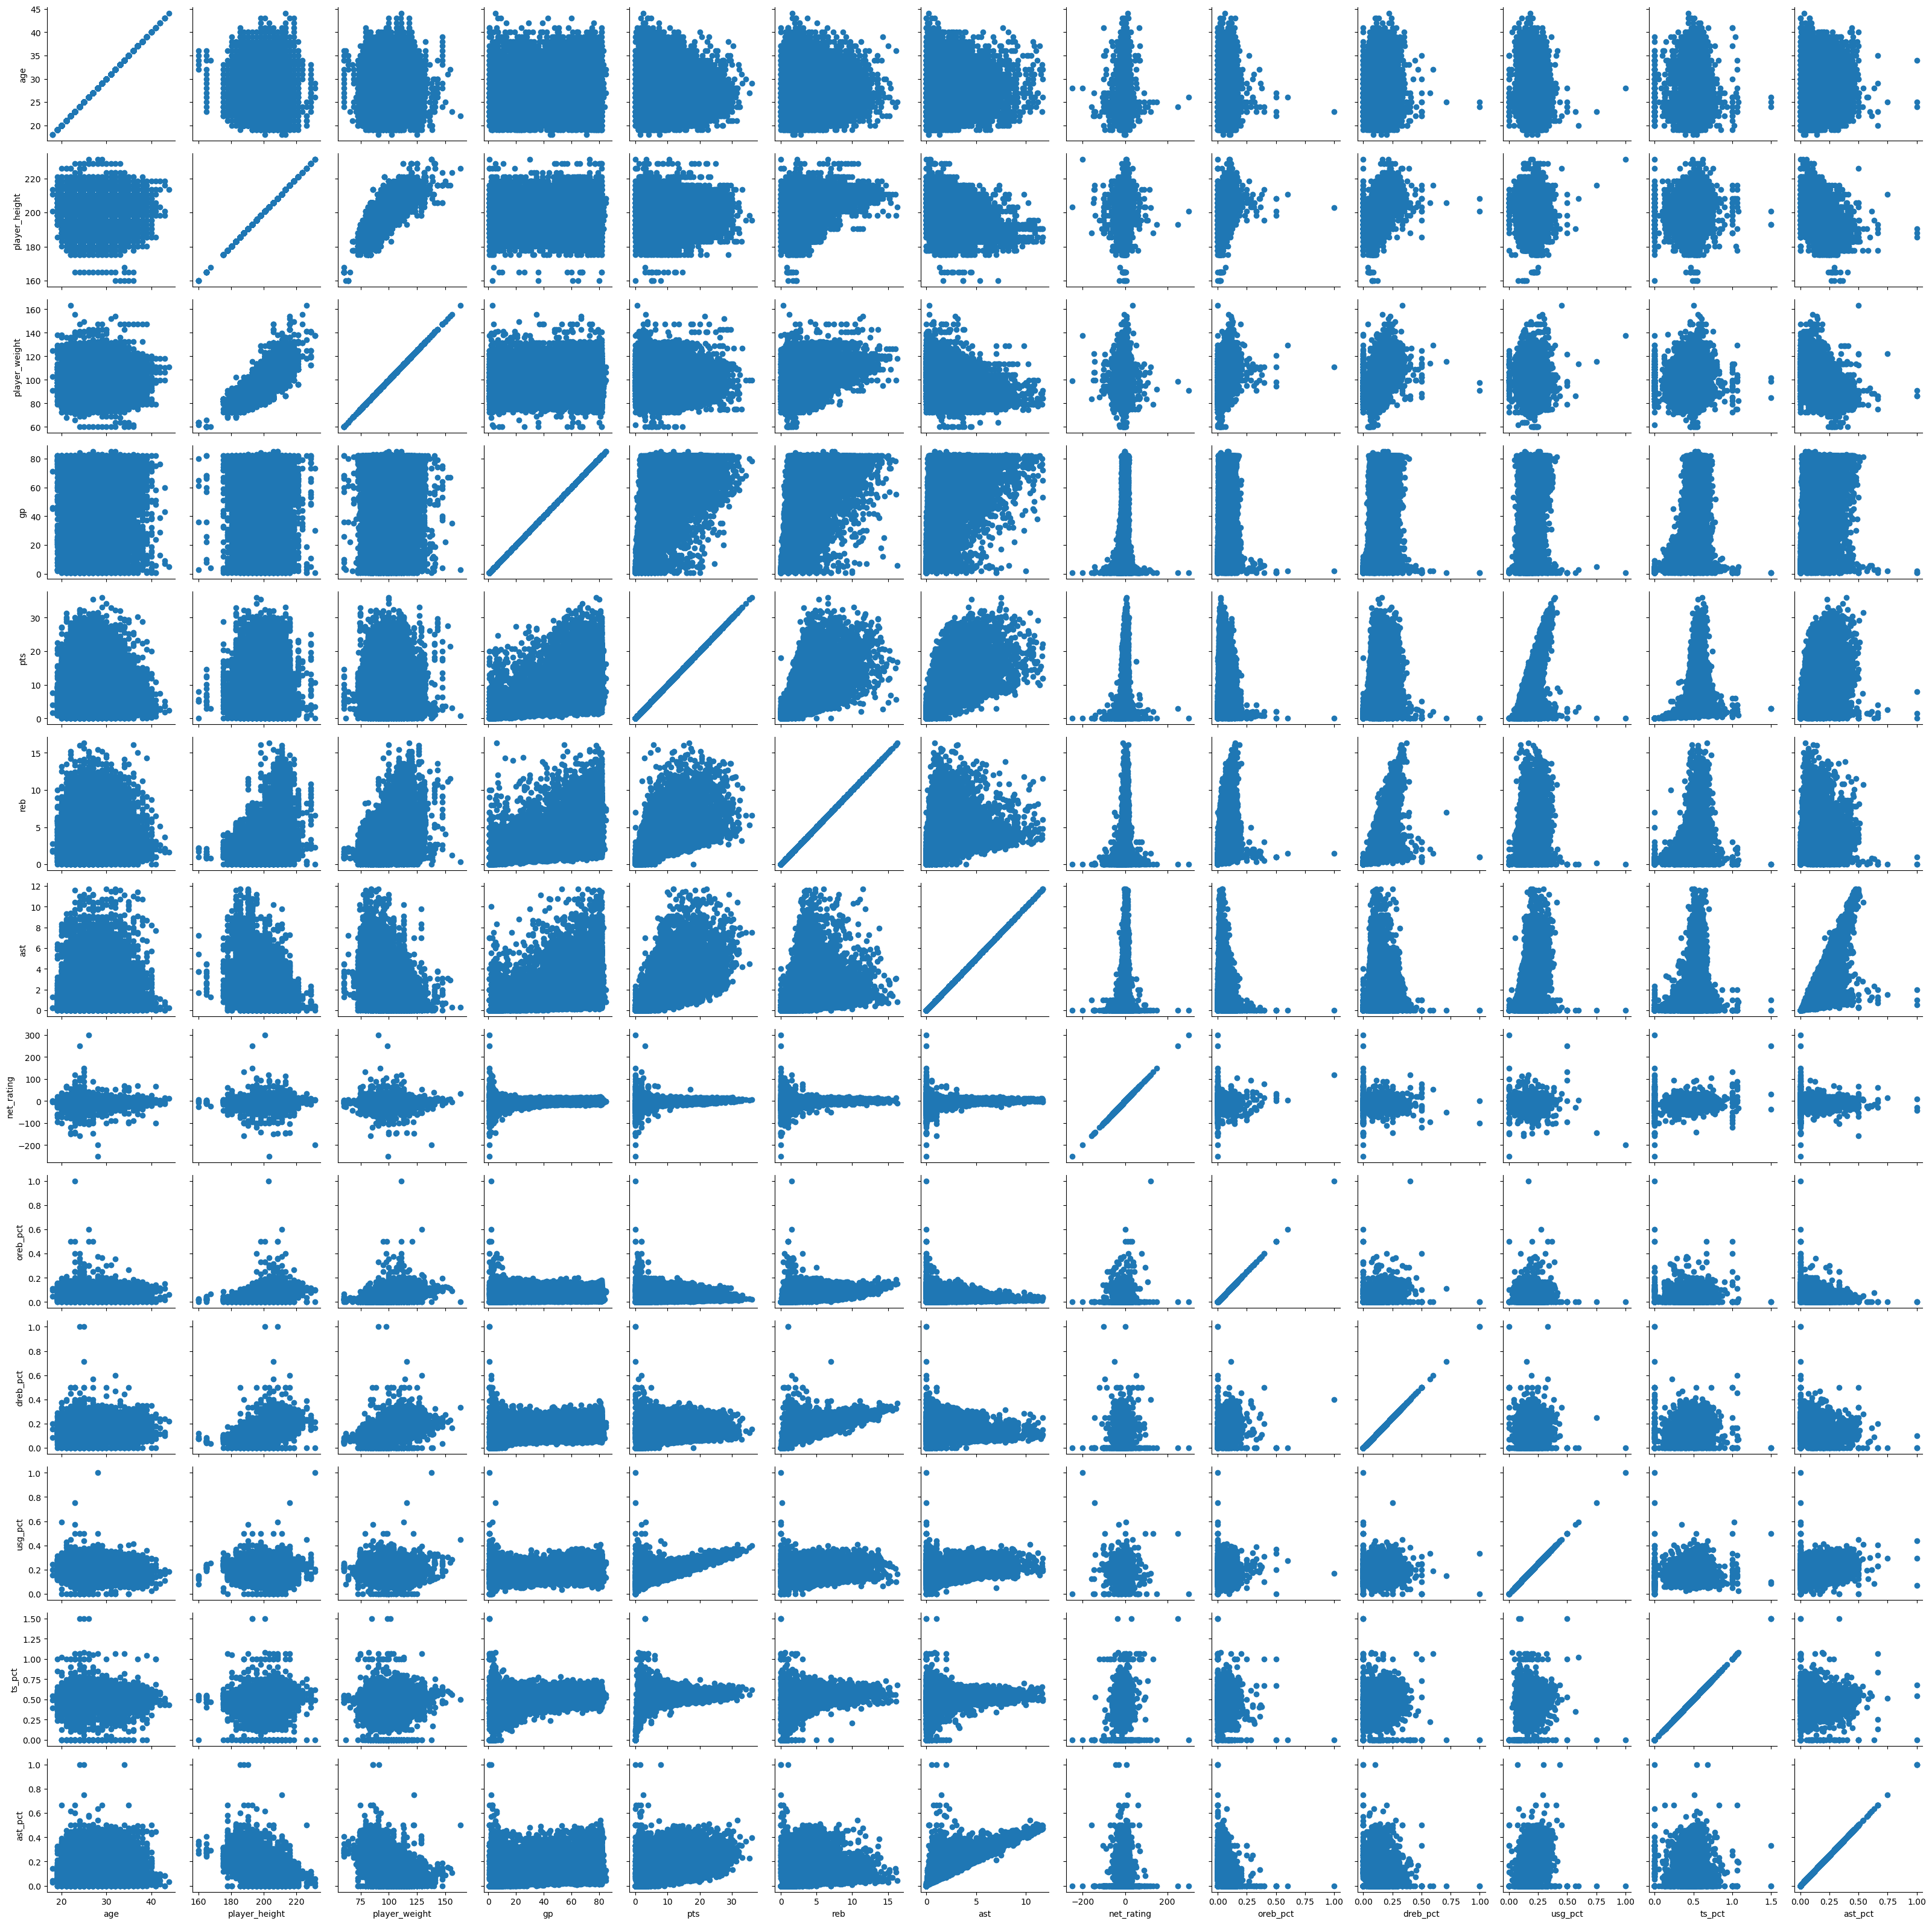

In [162]:
sns.PairGrid(nba_player_data,vars=["age","player_height", "player_weight", "gp", "pts", "reb","ast", "net_rating","oreb_pct","dreb_pct","usg_pct","ts_pct","ast_pct"]).map(plt.scatter)


<p>I did a pairgrid to see if there is any relationships that I could use for my dash board</p>

In [250]:
#exporting the updated dataset.
nba_player_data.to_csv("Data/all_seasons.csv")

<p>I exported the dataset to the all_season csv file to use for my dashboard.</p>